In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import h5py
import seaborn
seaborn.set()

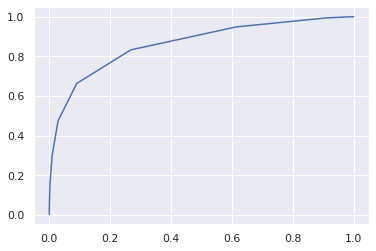

In [6]:
with h5py.File("../results/roc_curve_test_preprocessed_sampled.txt", 'r') as f:
    tprs = f['tprs'][:]
    fprs = f['fprs'][:]
    
plt.plot(fprs, tprs)